# Facial Skin Type Classificatin via MobileNetV2

## 1. Libraries

In [1]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import seaborn as sns
import os


## 2. Datasets and Data Augumentation

In [ ]:
# Define dataset path
data_dir = "D:\Minor Project Related\Data Sets ( Oily, Dry , Normal )\Set - 1" ## YAHA CHANGES LYAUNU PARCHA

# Set image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 16

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=20, horizontal_flip=True, validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='sparse', subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='sparse', subset='validation'
)

Found 2734 images belonging to 1 classes.
Found 683 images belonging to 1 classes.


## 2. Build & Fine-Tune/Compile Model

### - Load the MobileNetV2 model

In [26]:
# Load MobileNetV2 as base model
base_model = MobileNetV2(
    weights='imagenet', 
    include_top=False, 
    input_shape=(224, 224, 3)
    )


### - Freeze


In [ ]:
base_model.trainable = False  # Freeze base layers / freeze feature extractor

In [ ]:
# Create model - Yo bujina maile
x = GlobalAveragePooling2D()(base_model.output)
out = Dense(3, activation='softmax')(x)  # 3 classes: Normal, Dry, Oily

model = Model(inputs=base_model.input, outputs=out)

In [23]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## 3. Train

In [25]:
# Train model
history = model.fit(train_data, validation_data=val_data, epochs=3)


Epoch 1/3
130/171 ━━━━━━━━━━━━━━━━━━━━ 19s 473ms/step - accuracy: 0.9795 - loss: 0.0648

KeyboardInterrupt: 

# 4. Evaluate


In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

In [ ]:
import numpy as np

y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = test_data.classes


In [ ]:
from sklearn.metrics import classification_report

class_names = ['Normal', 'Dry', 'Oily']

print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


### - Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# 5. Ploltting(Training vs Validation Graphs)

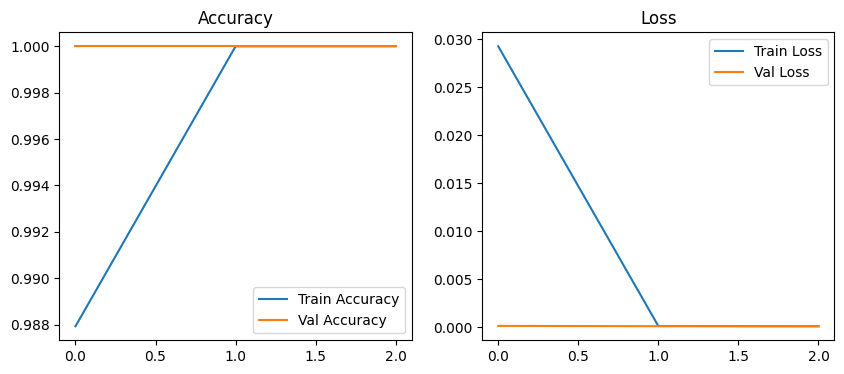

In [ ]:
# Plot accuracy & loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()



#From GPT
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.legend()
# plt.title("Accuracy Curve")
# plt.show()

# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.title("Loss Curve")
# plt.show()


## 4. Save & Test Model

In [ ]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define dataset path
data_dir = "/kaggle/input/normaldryoily-skin-type/data"
categories = ["dry", "normal", "oily"]

# Select six random images
selected_images = []
true_labels = []

for category in categories:
    category_path = os.path.join(data_dir, category)
    images = os.listdir(category_path)
    sampled_images = random.sample(images, 2)  # Select 2 images per category
    for img in sampled_images:
        selected_images.append(os.path.join(category_path, img))
        true_labels.append(category.capitalize())  # Convert category to readable label

# Prediction function
def predict_skin_type(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    labels = ["Dry", "Normal", "Oily"]
    return labels[np.argmax(pred)]

# Display results
plt.figure(figsize=(12, 8))

for i, img_path in enumerate(selected_images):
    pred_label = predict_skin_type(img_path)
    
    img = image.load_img(img_path, target_size=(150, 150))
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"True: {true_labels[i]}\nPred: {pred_label}")

plt.suptitle("Skin Type Prediction Results", fontsize=16)
plt.tight_layout()
plt.show()


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/normaldryoily-skin-type/data\\dry'